## Step function

In [8]:
import matplotlib.pylab as plt
import numpy as np

In [9]:
def binary_step(x):
    if x < 0:
        return 0
    else:
        return 1

In [10]:
x = list(np.linspace(-5, 5, 100))
y = list(map(lambda x: binary_step(x), x))

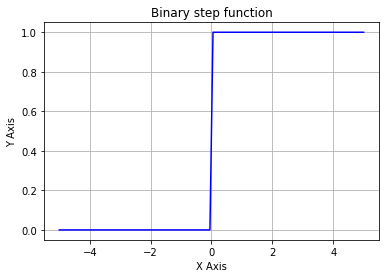

In [11]:
plt.plot(x, y,'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Binary step function')
plt.grid()
plt.show()

## Пример sklearn

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron      #Single-layer perceptron
from sklearn.neural_network import MLPClassifier #Multilayer perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Load the mnist dataset
mnist = datasets.load_digits()

In [15]:
# Create our X and y data
n_samples = len(mnist.images)
X = mnist.images.reshape((n_samples, -1))
y = mnist.target

In [16]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

In [19]:
# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [20]:
# Create a single-layer perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
# Create a multilayer perceptron object
mppn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(256, 512, 128), random_state=1)

In [23]:
# Train the perceptrons
ppn.fit(X_train_std, y_train)
mppn.fit(X_train_std, y_train)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 512, 128), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
# Apply the trained perceptrons on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test_std)
multi_y_pred = mppn.predict(X_test_std)

In [25]:
# View the accuracies of the model, which is: 1 - (observations predicted wrong / total observations)
print('Single-layer perceptron accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Multilayer perceptron accuracy: %.4f' % accuracy_score(y_test, multi_y_pred))

Single-layer perceptron accuracy: 0.9444
Multilayer perceptron accuracy: 0.9537


## Анализ полученных данных

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 500)

In [27]:
data = pd.read_csv("./analyse_step/step.csv")

In [28]:
data.head(11)

,k,w,y,E
0,0,"[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",3
1,1,"[0.0, 0.0, 0.0, 0.3, 0.3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",3
2,2,"[0.0, 0.0, 0.3, 0.6, 0.3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",3
3,3,"[0.0, 0.3, 0.6, 0.6, 0.3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",3
4,4,"[-0.3, 0.6, 0.6, 0.6, 0.3]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2
5,5,"[-0.5999999999999999, 0.6, 0.6, 0.6, 0.3]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1
6,6,"[-0.5999999999999999, 0.6, 0.6, 0.6, 0.6]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2
7,7,"[-0.5999999999999999, 0.6, 0.6, 0.8999999999999999, 0.6]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2
8,8,"[-0.5999999999999999, 0.6, 0.8999999999999999, 0.8999999999999999, 0.6]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2
9,9,"[-0.8999999999999999, 0.6, 0.8999999999999999, 0.8999999999999999, 0.3]","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]",0


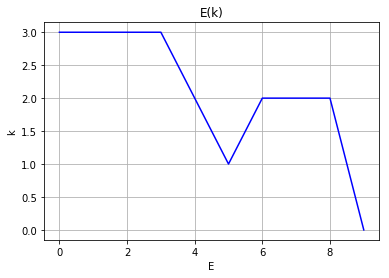

In [29]:
plt.plot(data['k'], data['E'],'b')
plt.xlabel('E')
plt.ylabel('k')
plt.title('E(k)')
plt.grid()
plt.show()

In [5]:
d = pd.read_csv("./find_min_vector_step/step.csv")

In [6]:
d.head(20)

,k,w,y,E
0,0,"[-0.3, -0.3, 0.3, 0.3, 0.0]","[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]",5
1,1,"[-0.3, -0.3, 0.3, 0.3, 0.3]","[1, 1, 0, 1, 1, 0, 1, 1, 0, 1]",2
2,2,"[-0.3, -0.3, 0.3, 0.6, 0.3]","[1, 1, 1, 0, 1, 0, 1, 1, 0, 1]",4
3,3,"[-0.3, -0.3, 0.6, 0.6, 0.6]","[1, 1, 1, 1, 0, 0, 1, 1, 0, 1]",4
4,4,"[-0.3, 0.0, 0.6, 0.6, 0.6]","[1, 1, 1, 1, 1, 0, 0, 1, 0, 1]",2
5,5,"[-0.6, 0.0, 0.6, 0.6, 0.6]","[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]",3
6,6,"[-0.5999999999999999, 0.0, 0.6, 0.8999999999999999, 0.6]","[1, 1, 1, 0, 1, 0, 1, 1, 0, 1]",4
7,7,"[-0.5999999999999999, 0.3, 0.6, 0.8999999999999999, 0.6]","[1, 1, 1, 1, 1, 0, 0, 1, 0, 1]",2
8,8,"[-0.5999999999999999, 0.3, 0.8999999999999999, 0.8999999999999999, 0.6]","[1, 1, 1, 1, 1, 0, 1, 0, 0, 1]",4
9,9,"[-0.8999999999999999, 0.3, 0.8999999999999999, 0.8999999999999999, 0.6]","[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]",3


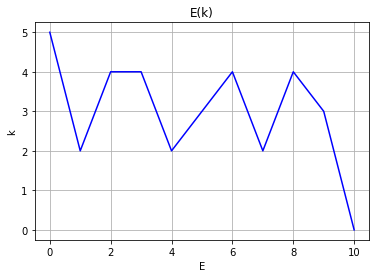

In [7]:
plt.plot(d['k'], d['E'],'b')
plt.xlabel('E')
plt.ylabel('k')
plt.title('E(k)')
plt.grid()
plt.show()